In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('soccer_player_2020.csv')
data.head(0)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [3]:
data_select = data[['overall','pace','shooting','passing','dribbling','defending','physic']]
data_select.head()

,overall,pace,shooting,passing,dribbling,defending,physic
0,94,87.0,92.0,92.0,96.0,39.0,66.0
1,93,90.0,93.0,82.0,89.0,35.0,78.0
2,92,91.0,85.0,87.0,95.0,32.0,58.0
3,91,NaN,NaN,NaN,NaN,NaN,NaN
4,91,91.0,83.0,86.0,94.0,35.0,66.0


In [4]:
data_select.isnull().sum()

overall         0
pace         2036
shooting     2036
passing      2036
dribbling    2036
defending    2036
physic       2036
dtype: int64

In [5]:
data_select = data_select.dropna()

In [6]:
data_select.isna().sum()

overall      0
pace         0
shooting     0
passing      0
dribbling    0
defending    0
physic       0
dtype: int64

In [7]:
data_select.shape

(16242, 7)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def size(lebar, tinggi):
    plt.figure(figsize=(lebar, tinggi))

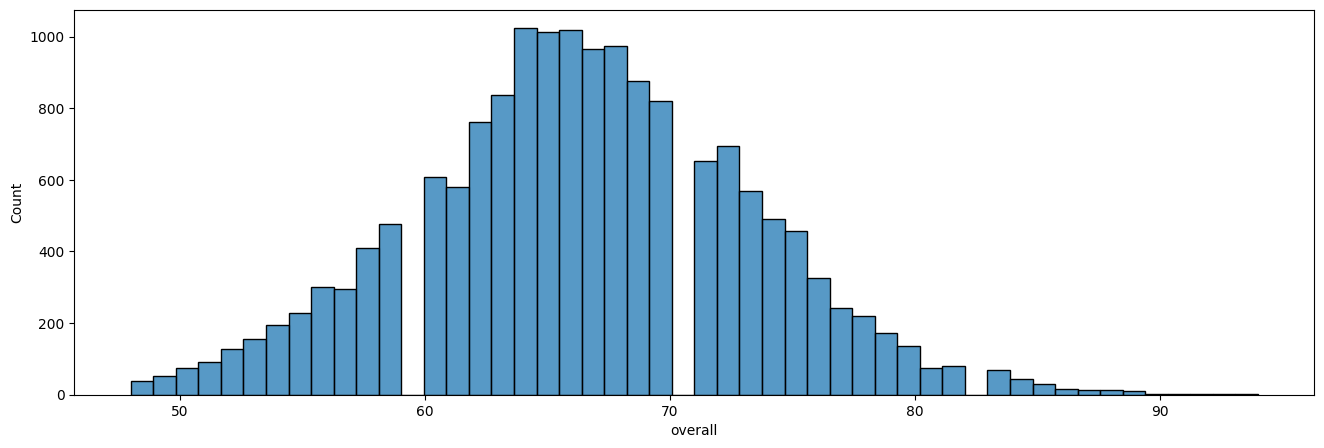

In [9]:
size(16,5)
sns.histplot(data=data_select, x='overall', bins=50);

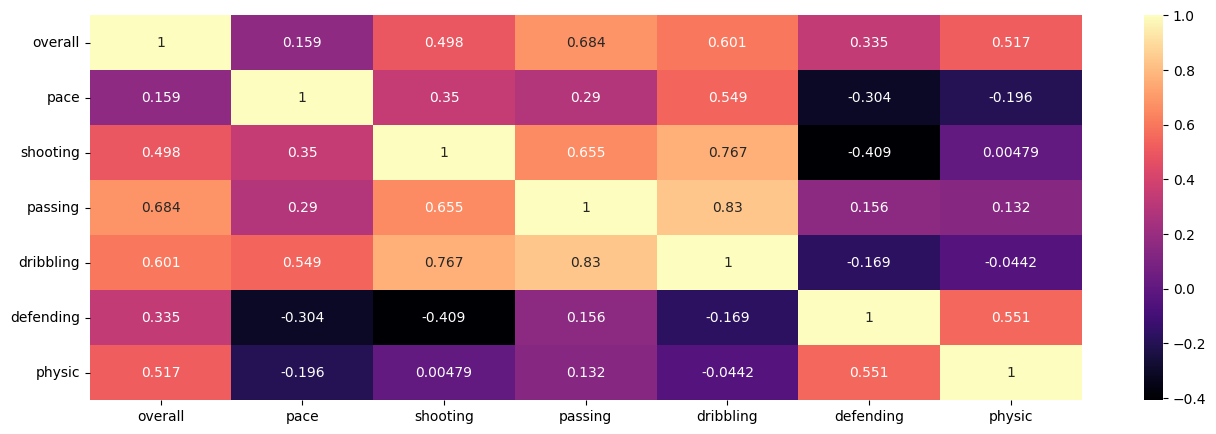

In [10]:
size(16,5)
sns.heatmap(data=data_select.corr(), annot=True,fmt='.3g', cmap='magma');

In [11]:
data_select.describe()

,overall,pace,shooting,passing,dribbling,defending,physic
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,66.426548,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678
std,6.842286,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162
min,48.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000
25%,62.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000
50%,66.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,71.000000,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000
max,94.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000


In [12]:
y = data_select.overall
x = data_select.drop(['overall'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [16]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
predict = clf.predict(x_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(f'the score for extra trees regressor is {r2_score(y_true=y_test, y_pred=predict)}')

the score for extra trees regressor is 0.964529107210892


<Axes: ylabel='overall'>

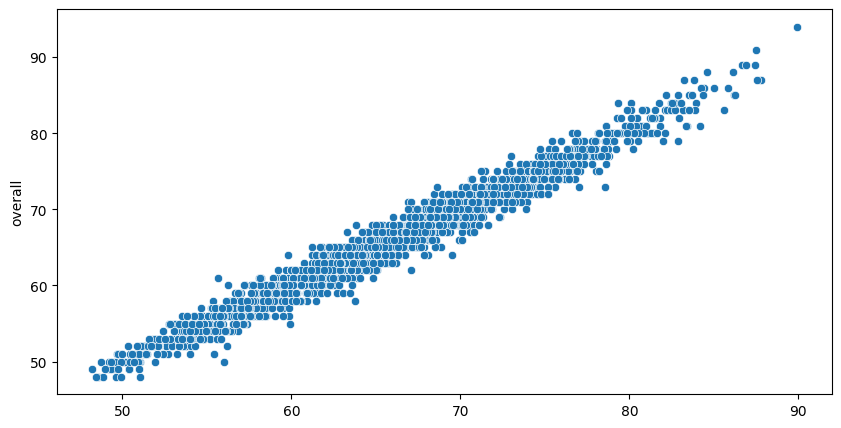

In [20]:
size(10,5)
sns.scatterplot(x=predict, y=y_test)

In [21]:
contoh = [[87,92,92,96,32,66]]

In [22]:
prediksi_contoh = clf.predict(contoh)

In [23]:
int(prediksi_contoh)

90

In [24]:
import pickle

In [27]:
pickle.dump(clf, open('clf.pkl', 'wb'))

In [26]:
# data_select.to_csv('data_select.csv')